In [26]:
import sys
sys.path.insert(0,'/home/olgan96/.env/lib/python3.11/site-packages/')

In [27]:
from sklearn.decomposition import PCA

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
import pandas as pd

In [30]:
import pandas as pd
import numpy as np

In [31]:
#df = pd.read_parquet('../../NO_BACKUP/tahoe/final_tahoe_no_overlappings.parquet')


In [232]:
df = pd.read_parquet('../../NO_BACKUP/tahoe/final_overlapping_lincs.parquet')

In [234]:
df['cell_line'].unique()

array(['CVCL_0023', 'CVCL_0028', 'CVCL_0179', 'CVCL_0293', 'CVCL_0320',
       'CVCL_0332', 'CVCL_0359', 'CVCL_1478'], dtype=object)

In [34]:
np.max(df['dose'])

np.float64(5.0)

In [35]:
len(df['cell_line_drug'].unique())

144

In [36]:
df_ = pd.read_parquet('../../NO_BACKUP/lincs_2020/signature_response_features_r2_top0.7_final.parquet')

In [44]:
df_filtered_ = df_[df_['cellosaurus_id'].isin(df['cell_line'])]

In [45]:
df_filtered_

,sig_id,pert_id,cellosaurus_id,inchi_key,cell_drug,nearest_dose,responses,cmap_name,smiles,fps_0,...,9985,9987,9988,9989,999,9990,9991,9992,9993,9997
0,ABY001_HT29_XH:BRD-K70511574:2.5:24,BRD-K70511574,CVCL_0320,OCKHRKSTDPOHEN-BQYQJAHWSA-N,CVCL_0320OCKHRKSTDPOHEN-BQYQJAHWSA-N,2.50,0.191586,HMN-214,COc1ccc(cc1)S(=O)(=O)N(C(C)=O)c1ccccc1C=Cc1cc[...,0,...,1.038500,0.062950,-0.116750,-1.074700,0.266150,0.312750,-0.311050,0.015850,0.774600,-0.510450
19,ASG002_A549_24H:L22,BRD-K32821942,CVCL_0023,LMEKQMALGUDUQG-UHFFFAOYSA-N,CVCL_0023LMEKQMALGUDUQG-UHFFFAOYSA-N,10.00,0.904585,azathioprine,Cn1cnc(c1Sc1[nH]cnc2ncnc12)[N+]([O-])=O,0,...,0.068989,0.792144,0.418449,0.342599,0.421773,-0.447499,-0.111944,0.457972,-0.110150,0.468579
20,ASG002_A549_24H:O15,BRD-K49865102,CVCL_0023,SUDAHWBOROXANE-SECBINFHSA-N,CVCL_0023SUDAHWBOROXANE-SECBINFHSA-N,0.12,0.538646,PD-0325901,OC[C@@H](O)CONC(=O)c1ccc(F)c(F)c1Nc1ccc(I)cc1F,0,...,0.107057,-0.307734,-0.812755,0.201306,0.107447,0.199247,0.107383,-0.321709,-0.789875,-0.448025
21,ASG002_A549_24H:A14,BRD-K28360340,CVCL_0023,PQAPVTKIEGUPRN-UHFFFAOYSA-N,CVCL_0023PQAPVTKIEGUPRN-UHFFFAOYSA-N,0.74,0.384553,TW-37,CC(C)c1ccccc1Cc1cc(C(=O)Nc2ccc(cc2)S(=O)(=O)c2...,0,...,-1.170669,-0.024623,0.321037,-1.033489,0.351681,-0.313008,-1.130287,-0.342774,-0.738231,-2.179882
22,ASG002_A549_24H:H11,BRD-K23478508,CVCL_0023,LTMHDMANZUZIPE-PUGKRICDSA-N,CVCL_0023LTMHDMANZUZIPE-PUGKRICDSA-N,1.11,0.020573,digoxin,C[C@H]1O[C@H](C[C@H](O)[C@@H]1O)O[C@@H]2[C@@H]...,0,...,-0.624985,0.096591,1.020989,0.026733,0.284950,0.638929,-0.089312,0.012925,-0.218809,0.433970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40489,PBIOA019_HT29_24H:K14,BRD-K82746043,CVCL_0320,JLYAXFNOILIKPP-KXQOOQHDSA-N,CVCL_0320JLYAXFNOILIKPP-KXQOOQHDSA-N,3.33,0.757420,navitoclax,CC1(C)CCC(=C(CN2CCN(CC2)c2ccc(cc2)C(=O)NS(=O)(...,0,...,-0.803439,0.636075,-0.139959,1.244759,-0.126507,0.498636,0.408721,0.631478,0.078900,0.980412
40490,PBIOA013_HT29_24H:C23,BRD-K60230970,CVCL_0320,TZYWCYJVHRLUCT-VABKMULXSA-N,CVCL_0320TZYWCYJVHRLUCT-VABKMULXSA-N,10.00,0.040362,MG-132,CC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@H](CC(...,0,...,-0.782621,-1.410710,-1.483109,1.578263,0.055012,5.193449,0.064709,1.480302,1.104397,-2.059611
40503,DOSBIO002_A549_24H:BRD-K81418486:0.37037,BRD-K81418486,CVCL_0023,WAEXFXRVDQXREF-UHFFFAOYSA-N,CVCL_0023WAEXFXRVDQXREF-UHFFFAOYSA-N,0.37,0.931899,vorinostat,ONC(=O)CCCCCCC(=O)Nc1ccccc1,0,...,0.387283,0.898531,1.320621,0.750294,0.221927,-0.895582,-0.434917,-0.795757,0.259107,-0.825385
40507,DOSVAL001_A549_24H:BRD-K19540840:5,BRD-K19540840,CVCL_0023,OUKYUETWWIPKQR-UHFFFAOYSA-N,CVCL_0023OUKYUETWWIPKQR-UHFFFAOYSA-N,4.00,0.706393,saracatinib,CN1CCN(CCOc2cc(OC3CCOCC3)c3c(Nc4c5OCOc5ccc4Cl)...,0,...,-0.236707,-0.196448,-0.334990,-0.230673,-0.650040,-1.271203,-0.336669,-0.480971,-0.794008,-0.868529


In [46]:
df_comp = pd.read_parquet('../../NO_BACKUP/pharmacodb/comp_pharmdb.parquet')

In [48]:
df_resp = pd.read_parquet('../../NO_BACKUP/tahoe/responses_overlap.parquet')

,inchikey,pubchem
0,KTEIFNKAUNYNJU-LBPRGKRZSA-N,56671814
1,GHASVSINZRGABV-UHFFFAOYSA-N,3385
7,MCJGNVYPOGVAJF-UHFFFAOYSA-N,1923
8,KVLFRAWTRWDEDF-IRXDYDNUSA-N,25262965
12,UZWDCWONPYILKI-UHFFFAOYSA-N,46220502
...,...,...
2642,SEJLPXCPMNSRAM-GOSISDBHSA-N,54755438
2643,HKTBYUWLRDZAJK-UHFFFAOYSA-N,118598754
2657,XEFQLINVKFYRCS-UHFFFAOYSA-N,5564
2661,VGGGPCQERPFHOB-RDBSUJKOSA-N,72172


In [62]:
df_filtered_

,sig_id,pert_id,cellosaurus_id,inchi_key,cell_drug,nearest_dose,responses,cmap_name,smiles,fps_0,...,9985,9987,9988,9989,999,9990,9991,9992,9993,9997
0,ABY001_HT29_XH:BRD-K70511574:2.5:24,BRD-K70511574,CVCL_0320,OCKHRKSTDPOHEN-BQYQJAHWSA-N,CVCL_0320OCKHRKSTDPOHEN-BQYQJAHWSA-N,2.50,0.191586,HMN-214,COc1ccc(cc1)S(=O)(=O)N(C(C)=O)c1ccccc1C=Cc1cc[...,0,...,1.038500,0.062950,-0.116750,-1.074700,0.266150,0.312750,-0.311050,0.015850,0.774600,-0.510450
19,ASG002_A549_24H:L22,BRD-K32821942,CVCL_0023,LMEKQMALGUDUQG-UHFFFAOYSA-N,CVCL_0023LMEKQMALGUDUQG-UHFFFAOYSA-N,10.00,0.904585,azathioprine,Cn1cnc(c1Sc1[nH]cnc2ncnc12)[N+]([O-])=O,0,...,0.068989,0.792144,0.418449,0.342599,0.421773,-0.447499,-0.111944,0.457972,-0.110150,0.468579
20,ASG002_A549_24H:O15,BRD-K49865102,CVCL_0023,SUDAHWBOROXANE-SECBINFHSA-N,CVCL_0023SUDAHWBOROXANE-SECBINFHSA-N,0.12,0.538646,PD-0325901,OC[C@@H](O)CONC(=O)c1ccc(F)c(F)c1Nc1ccc(I)cc1F,0,...,0.107057,-0.307734,-0.812755,0.201306,0.107447,0.199247,0.107383,-0.321709,-0.789875,-0.448025
21,ASG002_A549_24H:A14,BRD-K28360340,CVCL_0023,PQAPVTKIEGUPRN-UHFFFAOYSA-N,CVCL_0023PQAPVTKIEGUPRN-UHFFFAOYSA-N,0.74,0.384553,TW-37,CC(C)c1ccccc1Cc1cc(C(=O)Nc2ccc(cc2)S(=O)(=O)c2...,0,...,-1.170669,-0.024623,0.321037,-1.033489,0.351681,-0.313008,-1.130287,-0.342774,-0.738231,-2.179882
22,ASG002_A549_24H:H11,BRD-K23478508,CVCL_0023,LTMHDMANZUZIPE-PUGKRICDSA-N,CVCL_0023LTMHDMANZUZIPE-PUGKRICDSA-N,1.11,0.020573,digoxin,C[C@H]1O[C@H](C[C@H](O)[C@@H]1O)O[C@@H]2[C@@H]...,0,...,-0.624985,0.096591,1.020989,0.026733,0.284950,0.638929,-0.089312,0.012925,-0.218809,0.433970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40489,PBIOA019_HT29_24H:K14,BRD-K82746043,CVCL_0320,JLYAXFNOILIKPP-KXQOOQHDSA-N,CVCL_0320JLYAXFNOILIKPP-KXQOOQHDSA-N,3.33,0.757420,navitoclax,CC1(C)CCC(=C(CN2CCN(CC2)c2ccc(cc2)C(=O)NS(=O)(...,0,...,-0.803439,0.636075,-0.139959,1.244759,-0.126507,0.498636,0.408721,0.631478,0.078900,0.980412
40490,PBIOA013_HT29_24H:C23,BRD-K60230970,CVCL_0320,TZYWCYJVHRLUCT-VABKMULXSA-N,CVCL_0320TZYWCYJVHRLUCT-VABKMULXSA-N,10.00,0.040362,MG-132,CC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@H](CC(...,0,...,-0.782621,-1.410710,-1.483109,1.578263,0.055012,5.193449,0.064709,1.480302,1.104397,-2.059611
40503,DOSBIO002_A549_24H:BRD-K81418486:0.37037,BRD-K81418486,CVCL_0023,WAEXFXRVDQXREF-UHFFFAOYSA-N,CVCL_0023WAEXFXRVDQXREF-UHFFFAOYSA-N,0.37,0.931899,vorinostat,ONC(=O)CCCCCCC(=O)Nc1ccccc1,0,...,0.387283,0.898531,1.320621,0.750294,0.221927,-0.895582,-0.434917,-0.795757,0.259107,-0.825385
40507,DOSVAL001_A549_24H:BRD-K19540840:5,BRD-K19540840,CVCL_0023,OUKYUETWWIPKQR-UHFFFAOYSA-N,CVCL_0023OUKYUETWWIPKQR-UHFFFAOYSA-N,4.00,0.706393,saracatinib,CN1CCN(CCOc2cc(OC3CCOCC3)c3c(Nc4c5OCOc5ccc4Cl)...,0,...,-0.236707,-0.196448,-0.334990,-0.230673,-0.650040,-1.271203,-0.336669,-0.480971,-0.794008,-0.868529


In [59]:
df = df.merge(df_resp[['inchikey', 'pubchem']].drop_duplicates(subset=['pubchem']), left_on='pubchem_cid', right_on='pubchem')

In [61]:
df = df.reset_index(drop=True)

In [67]:
df_filtered_ = df_filtered_[df_filtered_['cell_drug'].isin(df['cell_line_drug'])]

In [71]:
df_filtered_

,sig_id,pert_id,cellosaurus_id,inchi_key,cell_drug,nearest_dose,responses,cmap_name,smiles,fps_0,...,9985,9987,9988,9989,999,9990,9991,9992,9993,9997
25,ASG003_A549_24H:P01,BRD-K02130563,CVCL_0023,FPOHNWQLNRZRFC-ZHACJKMWSA-N,CVCL_0023FPOHNWQLNRZRFC-ZHACJKMWSA-N,10.000,0.088270,panobinostat,Cc1[nH]c2ccccc2c1CCNCc1ccc(C=CC(=O)NO)cc1,0,...,3.096106,-3.559902,-0.397357,-3.230577,1.807215,1.936968,-3.179023,0.248675,5.360637,0.623531
52,ASG002_HEC1A_24H:I21,BRD-K44227013,CVCL_0293,PHXJVRSECIGDHY-UHFFFAOYSA-N,CVCL_0293PHXJVRSECIGDHY-UHFFFAOYSA-N,0.120,0.910379,ponatinib,CN1CCN(Cc2ccc(NC(=O)c3ccc(C)c(c3)C#Cc3cnc4cccn...,0,...,-1.271000,0.166400,0.744900,0.238400,0.844500,-0.346300,0.399600,-1.552500,-0.557900,-0.488200
83,ASG002_NCIH1573_24H:P15,BRD-K78659596,CVCL_1478,MXAYKZJJDUDWDS-LBPRGKRZSA-N,CVCL_1478MXAYKZJJDUDWDS-LBPRGKRZSA-N,0.120,0.998124,ixazomib,CC(C)C[C@H](NC(=O)CNC(=O)c1cc(Cl)ccc1Cl)B(O)O,0,...,-1.026200,0.788900,0.233000,0.314900,0.323200,-0.888700,-0.362200,-0.471200,0.240900,-0.348700
178,LJP005_A549_24H:P23,BRD-K12343256,CVCL_0023,LIRYPHYGHXZJBZ-UHFFFAOYSA-N,CVCL_0023LIRYPHYGHXZJBZ-UHFFFAOYSA-N,0.120,0.360945,trametinib,CC(=O)Nc1cccc(c1)-n1c2c(C)c(=O)n(C)c(Nc3ccc(I)...,0,...,1.101700,-1.072700,1.158100,-1.592500,0.866300,0.441600,-0.167400,1.747500,1.509300,1.800000
194,LJP005_HT29_24H:C15,BRD-K56343971,CVCL_0320,GPXBXXGIAQBQNI-UHFFFAOYSA-N,CVCL_0320GPXBXXGIAQBQNI-UHFFFAOYSA-N,1.110,0.311676,vemurafenib,CCCS(=O)(=O)Nc1ccc(F)c(C(=O)c2c[nH]c3ncc(cc23)...,0,...,0.197382,-0.088556,-0.655784,-0.431992,1.361228,0.387523,-0.281458,0.954174,-0.500447,-1.145475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40474,PBIOA013_A549_24H:L17,BRD-K02637541,CVCL_0023,RZEKVGVHFLEQIL-UHFFFAOYSA-N,CVCL_0023RZEKVGVHFLEQIL-UHFFFAOYSA-N,0.125,1.000000,celecoxib,Cc1ccc(cc1)-c1cc(nn1-c1ccc(cc1)S(N)(=O)=O)C(F)...,0,...,-0.049300,-0.479850,0.115000,0.937150,-0.914350,-0.537650,0.089650,-0.280900,0.132850,0.134950
40478,PBIOA020_A549_24H:K12,BRD-K88510285,CVCL_0023,GXJABQQUPOEUTA-RDJZCZTQSA-N,CVCL_0023GXJABQQUPOEUTA-RDJZCZTQSA-N,10.000,0.176951,bortezomib,CC(C)C[C@H](NC(=O)[C@H](Cc1ccccc1)NC(=O)c1cncc...,0,...,1.528463,-1.043404,0.299176,-1.552901,-0.408340,3.407411,-0.472059,1.232047,1.245680,-1.169673
40479,PBIOA022_A549_24H:O11,BRD-K79254416,CVCL_0023,XAUDJQYHKZQPEU-KVQBGUIXSA-N,CVCL_0023XAUDJQYHKZQPEU-KVQBGUIXSA-N,0.125,0.988953,decitabine,Nc1ncn([C@H]2C[C@H](O)[C@@H](CO)O2)c(=O)n1,0,...,0.512577,-0.603507,-0.446247,-0.381210,-0.493895,0.547163,0.124643,0.379952,0.388018,0.353015
40481,PBIOA019_HT29_24H:G18,BRD-K88510285,CVCL_0320,GXJABQQUPOEUTA-RDJZCZTQSA-N,CVCL_0320GXJABQQUPOEUTA-RDJZCZTQSA-N,10.000,0.109955,bortezomib,CC(C)C[C@H](NC(=O)[C@H](Cc1ccccc1)NC(=O)c1cncc...,0,...,0.007000,0.674600,0.965900,-0.387600,-0.287900,4.484000,1.241600,0.739100,0.012200,-2.563600


In [157]:
x1 = df[df['cell_line_drug'] == 'CVCL_0023KVLFRAWTRWDEDF-IRXDYDNUSA-N']

In [158]:
x1

,index,cl_sm_dose,cell_line,drug,dose,pubchem_cid,cell_line_drug,responses,smiles,fps_0,...,9988,9989,999,9990,9991,9992,9993,9997,inchikey,pubchem
0,2,CVCL_0023_AZD-8055_0.05,CVCL_0023,AZD-8055,0.05,25262965,CVCL_0023KVLFRAWTRWDEDF-IRXDYDNUSA-N,0.689011,CC1COCCN1C2=NC(=NC3=C2C=CC(=N3)C4=CC(=C(C=C4)O...,0,...,0.087598,0.663222,0.103934,-0.031691,2.111688,0.0,-1.267154,0.513679,KVLFRAWTRWDEDF-IRXDYDNUSA-N,25262965
58,1166,CVCL_0023_AZD-8055_5.0,CVCL_0023,AZD-8055,5.00,25262965,CVCL_0023KVLFRAWTRWDEDF-IRXDYDNUSA-N,0.222220,CC1COCCN1C2=NC(=NC3=C2C=CC(=N3)C4=CC(=C(C=C4)O...,0,...,0.112622,0.920327,-0.227852,0.507376,2.272421,0.0,-0.746823,0.675369,KVLFRAWTRWDEDF-IRXDYDNUSA-N,25262965


In [159]:
x1 = x1[x1['dose'] == 5][cols_expr].values[0]

In [160]:
x2 = df_filtered_[df_filtered_['cell_drug'] == 'CVCL_0023KVLFRAWTRWDEDF-IRXDYDNUSA-N']

In [161]:
x2

,sig_id,pert_id,cellosaurus_id,inchi_key,cell_drug,nearest_dose,responses,cmap_name,smiles,fps_0,...,9985,9987,9988,9989,999,9990,9991,9992,9993,9997
3170,ASG003_A549_24H:L12,BRD-K69932463,CVCL_0023,KVLFRAWTRWDEDF-IRXDYDNUSA-N,CVCL_0023KVLFRAWTRWDEDF-IRXDYDNUSA-N,0.12,0.541489,AZD-8055,COc1ccc(cc1CO)-c1ccc2c(nc(nc2n1)N1CCOC[C@@H]1C...,0,...,0.157553,0.438238,1.040922,0.161343,0.240432,0.673861,-0.912972,-0.729054,0.134444,0.469341
8667,LJP006_A549_24H:A12,BRD-K69932463,CVCL_0023,KVLFRAWTRWDEDF-IRXDYDNUSA-N,CVCL_0023KVLFRAWTRWDEDF-IRXDYDNUSA-N,0.04,0.717992,AZD-8055,COc1ccc(cc1CO)-c1ccc2c(nc(nc2n1)N1CCOC[C@@H]1C...,0,...,-1.076450,0.373200,2.938200,-0.081800,0.070100,-0.099650,0.279700,-1.209750,-0.766450,-0.885350
10187,ASG003_A549_24H:L10,BRD-K69932463,CVCL_0023,KVLFRAWTRWDEDF-IRXDYDNUSA-N,CVCL_0023KVLFRAWTRWDEDF-IRXDYDNUSA-N,10.00,0.215453,AZD-8055,COc1ccc(cc1CO)-c1ccc2c(nc(nc2n1)N1CCOC[C@@H]1C...,0,...,0.249716,1.580878,1.474394,-0.799401,0.073003,1.879198,-1.012278,0.467997,-0.027969,0.534048
11205,ASG002_A549_24H:B03,BRD-K69932463,CVCL_0023,KVLFRAWTRWDEDF-IRXDYDNUSA-N,CVCL_0023KVLFRAWTRWDEDF-IRXDYDNUSA-N,0.12,0.541489,AZD-8055,COc1ccc(cc1CO)-c1ccc2c(nc(nc2n1)N1CCOC[C@@H]1C...,0,...,0.243236,0.701945,1.398666,0.563630,0.967104,-0.122535,-1.171351,-0.223708,0.237590,-0.046195
14235,ASG003_A549_24H:L11,BRD-K69932463,CVCL_0023,KVLFRAWTRWDEDF-IRXDYDNUSA-N,CVCL_0023KVLFRAWTRWDEDF-IRXDYDNUSA-N,1.11,0.258749,AZD-8055,COc1ccc(cc1CO)-c1ccc2c(nc(nc2n1)N1CCOC[C@@H]1C...,0,...,-0.418589,1.349553,0.789108,-0.513402,0.165950,1.508183,-0.290672,0.038731,-0.206338,0.407930
15774,LJP006_A549_24H:A10,BRD-K69932463,CVCL_0023,KVLFRAWTRWDEDF-IRXDYDNUSA-N,CVCL_0023KVLFRAWTRWDEDF-IRXDYDNUSA-N,0.37,0.342402,AZD-8055,COc1ccc(cc1CO)-c1ccc2c(nc(nc2n1)N1CCOC[C@@H]1C...,0,...,-1.037450,0.512750,-0.414150,1.555150,0.370950,-0.018350,0.232000,0.573450,0.049150,0.751500
25780,LJP006_A549_24H:A07,BRD-K69932463,CVCL_0023,KVLFRAWTRWDEDF-IRXDYDNUSA-N,CVCL_0023KVLFRAWTRWDEDF-IRXDYDNUSA-N,10.00,0.215453,AZD-8055,COc1ccc(cc1CO)-c1ccc2c(nc(nc2n1)N1CCOC[C@@H]1C...,0,...,0.132750,0.671600,1.964850,0.650450,0.277200,2.627800,0.254800,1.703300,1.859850,1.318650
27276,LJP006_A549_24H:A11,BRD-K69932463,CVCL_0023,KVLFRAWTRWDEDF-IRXDYDNUSA-N,CVCL_0023KVLFRAWTRWDEDF-IRXDYDNUSA-N,0.12,0.541489,AZD-8055,COc1ccc(cc1CO)-c1ccc2c(nc(nc2n1)N1CCOC[C@@H]1C...,0,...,-0.665700,0.669600,0.261400,0.916300,-0.690150,0.852450,2.536400,-0.723950,-0.978600,-0.711650
29288,LJP006_A549_24H:A09,BRD-K69932463,CVCL_0023,KVLFRAWTRWDEDF-IRXDYDNUSA-N,CVCL_0023KVLFRAWTRWDEDF-IRXDYDNUSA-N,1.11,0.258749,AZD-8055,COc1ccc(cc1CO)-c1ccc2c(nc(nc2n1)N1CCOC[C@@H]1C...,0,...,-0.204250,0.026100,-1.650750,0.162700,0.038800,0.436300,0.348550,-0.010850,0.795250,0.218400
36642,LJP006_A549_24H:A08,BRD-K69932463,CVCL_0023,KVLFRAWTRWDEDF-IRXDYDNUSA-N,CVCL_0023KVLFRAWTRWDEDF-IRXDYDNUSA-N,3.33,0.228115,AZD-8055,COc1ccc(cc1CO)-c1ccc2c(nc(nc2n1)N1CCOC[C@@H]1C...,0,...,0.589100,0.114850,0.380250,0.735700,0.060700,0.379550,0.638400,0.624700,0.547450,-0.520100


In [162]:
x2 = x2[x2['nearest_dose'] == 3.33][cols_expr].values[0]

In [163]:
np.corrcoef(x1, x2)

array([[ 1.        , -0.04865624],
       [-0.04865624,  1.        ]])

In [175]:
a = df[cols_expr].values

In [176]:
b = df_[cols_expr].values

In [183]:
b.shape[0]

1283

In [187]:
from tqdm import tqdm

m = np.zeros((a.shape[0], b.shape[0]))
for j in tqdm(range(len(b))):
    for i in range(len(a)):    
        m[i][j] = np.corrcoef(a[i], b[j])[0, 1].item()

100%|██████████| 1283/1283 [05:12<00:00,  4.10it/s]


In [207]:
abs(m)

array([[0.20076332, 0.00700048, 0.04552232, ..., 0.0326492 , 0.01198126,
        0.04574704],
       [0.18152853, 0.00418791, 0.04553373, ..., 0.03892756, 0.00107455,
        0.04293725],
       [0.18089644, 0.00291266, 0.03821934, ..., 0.0409241 , 0.03360127,
        0.03221606],
       ...,
       [0.28005143, 0.05897658, 0.00699189, ..., 0.02368011, 0.03890397,
        0.00308986],
       [0.0070393 , 0.08666784, 0.03499961, ..., 0.01418593, 0.10986913,
        0.09255561],
       [0.00669095, 0.08885529, 0.03401924, ..., 0.01483723, 0.11693072,
        0.05780784]], shape=(298, 1283))

In [219]:
df_concat = pd.concat([df[df.columns[:9]].reset_index(drop=True), df_.iloc[m.argmax(1)][df_.columns[:9]].reset_index(drop=True)], axis=1)

In [223]:
df_concat

,index,cl_sm_dose,cell_line,drug,dose,pubchem_cid,cell_line_drug,responses,smiles,sig_id,pert_id,cellosaurus_id,inchi_key,cell_drug,nearest_dose,responses,cmap_name,smiles
0,2,CVCL_0023_AZD-8055_0.05,CVCL_0023,AZD-8055,0.05,25262965,CVCL_0023KVLFRAWTRWDEDF-IRXDYDNUSA-N,0.689011,CC1COCCN1C2=NC(=NC3=C2C=CC(=N3)C4=CC(=C(C=C4)O...,ASG003_A549_24H:L12,BRD-K69932463,CVCL_0023,KVLFRAWTRWDEDF-IRXDYDNUSA-N,CVCL_0023KVLFRAWTRWDEDF-IRXDYDNUSA-N,0.12,0.541489,AZD-8055,COc1ccc(cc1CO)-c1ccc2c(nc(nc2n1)N1CCOC[C@@H]1C...
1,4,CVCL_0023_Afatinib_0.05,CVCL_0023,Afatinib,0.05,10184653,CVCL_0023ULXXDDBFHOBEHA-CWDCEQMOSA-N,0.912780,CN(C)CC=CC(=O)NC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC(...,ASG003_A549_24H:L12,BRD-K69932463,CVCL_0023,KVLFRAWTRWDEDF-IRXDYDNUSA-N,CVCL_0023KVLFRAWTRWDEDF-IRXDYDNUSA-N,0.12,0.541489,AZD-8055,COc1ccc(cc1CO)-c1ccc2c(nc(nc2n1)N1CCOC[C@@H]1C...
2,5,CVCL_0023_Anastrozole_0.05,CVCL_0023,Anastrozole,0.05,2187,CVCL_0023YBBLVLTVTVSKRW-UHFFFAOYSA-N,1.000000,CC(C)(C#N)C1=CC(=CC(=C1)CN2C=NC=N2)C(C)(C)C#N,ASG003_A549_24H:L12,BRD-K69932463,CVCL_0023,KVLFRAWTRWDEDF-IRXDYDNUSA-N,CVCL_0023KVLFRAWTRWDEDF-IRXDYDNUSA-N,0.12,0.541489,AZD-8055,COc1ccc(cc1CO)-c1ccc2c(nc(nc2n1)N1CCOC[C@@H]1C...
3,8,CVCL_0023_BI-78D3_0.05,CVCL_0023,BI-78D3,0.05,2747117,CVCL_0023QFRLDZGQEZCCJZ-UHFFFAOYSA-N,1.000000,C1COC2=C(O1)C=CC(=C2)N3C(=O)NN=C3SC4=NC=C(S4)[...,ASG003_A549_24H:L12,BRD-K69932463,CVCL_0023,KVLFRAWTRWDEDF-IRXDYDNUSA-N,CVCL_0023KVLFRAWTRWDEDF-IRXDYDNUSA-N,0.12,0.541489,AZD-8055,COc1ccc(cc1CO)-c1ccc2c(nc(nc2n1)N1CCOC[C@@H]1C...
4,10,CVCL_0023_Binimetinib_0.05,CVCL_0023,Binimetinib,0.05,10288191,CVCL_0023ACWZRVQXLIRSDF-UHFFFAOYSA-N,0.840591,CN1C=NC2=C1C=C(C(=C2F)NC3=C(C=C(C=C3)Br)F)C(=O...,ASG003_A549_24H:L12,BRD-K69932463,CVCL_0023,KVLFRAWTRWDEDF-IRXDYDNUSA-N,CVCL_0023KVLFRAWTRWDEDF-IRXDYDNUSA-N,0.12,0.541489,AZD-8055,COc1ccc(cc1CO)-c1ccc2c(nc(nc2n1)N1CCOC[C@@H]1C...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,7685,CVCL_1478_5-Azacytidine_0.5,CVCL_1478,5-Azacytidine,0.50,9444,CVCL_1478NMUSYJAQQFHJEW-KVTDHHQDSA-N,0.969360,C1=NC(=NC(=O)N1C2C(C(C(O2)CO)O)O)N,ERBB2002_XC_24H:BRD-K66175015:1,BRD-K66175015,CVCL_0028,ULXXDDBFHOBEHA-CWDCEQMOSA-N,CVCL_0028ULXXDDBFHOBEHA-CWDCEQMOSA-N,1.11,0.907160,afatinib,CN(C)CC=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc...
294,7692,CVCL_1478_Gefitinib_0.5,CVCL_1478,Gefitinib,0.50,123631,CVCL_1478XGALLCVXEZPNRQ-UHFFFAOYSA-N,0.751318,COC1=C(C=C2C(=C1)N=CN=C2NC3=CC(=C(C=C3)F)Cl)OC...,ERBB2002_XC_24H:BRD-K66175015:1,BRD-K66175015,CVCL_0028,ULXXDDBFHOBEHA-CWDCEQMOSA-N,CVCL_0028ULXXDDBFHOBEHA-CWDCEQMOSA-N,1.11,0.907160,afatinib,CN(C)CC=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc...
295,7695,CVCL_1478_Panobinostat_0.5,CVCL_1478,Panobinostat,0.50,6918837,CVCL_1478FPOHNWQLNRZRFC-ZHACJKMWSA-N,0.133373,CC1=C(C2=CC=CC=C2N1)CCNCC3=CC=C(C=C3)C=CC(=O)NO,ASG003_A549_24H:P01,BRD-K02130563,CVCL_0023,FPOHNWQLNRZRFC-ZHACJKMWSA-N,CVCL_0023FPOHNWQLNRZRFC-ZHACJKMWSA-N,10.00,0.088270,panobinostat,Cc1[nH]c2ccccc2c1CCNCc1ccc(C=CC(=O)NO)cc1
296,7698,CVCL_1478_Trametinib_0.5,CVCL_1478,Trametinib,0.50,11707110,CVCL_1478LIRYPHYGHXZJBZ-UHFFFAOYSA-N,0.493729,CC1=C2C(=C(N(C1=O)C)NC3=C(C=C(C=C3)I)F)C(=O)N(...,LJP005_HT29_24H:P20,BRD-K12343256,CVCL_0320,LIRYPHYGHXZJBZ-UHFFFAOYSA-N,CVCL_0320LIRYPHYGHXZJBZ-UHFFFAOYSA-N,3.33,0.272203,trametinib,CC(=O)Nc1cccc(c1)-n1c2c(C)c(=O)n(C)c(Nc3ccc(I)...


In [226]:
df_concat[(df_concat['cell_line'] == df_concat['cellosaurus_id']) &(df_concat['drug'] == df_concat['cmap_name'])]

,index,cl_sm_dose,cell_line,drug,dose,pubchem_cid,cell_line_drug,responses,smiles,sig_id,pert_id,cellosaurus_id,inchi_key,cell_drug,nearest_dose,responses,cmap_name,smiles
0,2,CVCL_0023_AZD-8055_0.05,CVCL_0023,AZD-8055,0.05,25262965,CVCL_0023KVLFRAWTRWDEDF-IRXDYDNUSA-N,0.689011,CC1COCCN1C2=NC(=NC3=C2C=CC(=N3)C4=CC(=C(C=C4)O...,ASG003_A549_24H:L12,BRD-K69932463,CVCL_0023,KVLFRAWTRWDEDF-IRXDYDNUSA-N,CVCL_0023KVLFRAWTRWDEDF-IRXDYDNUSA-N,0.12,0.541489,AZD-8055,COc1ccc(cc1CO)-c1ccc2c(nc(nc2n1)N1CCOC[C@@H]1C...
58,1166,CVCL_0023_AZD-8055_5.0,CVCL_0023,AZD-8055,5.00,25262965,CVCL_0023KVLFRAWTRWDEDF-IRXDYDNUSA-N,0.222220,CC1COCCN1C2=NC(=NC3=C2C=CC(=N3)C4=CC(=C(C=C4)O...,ASG003_A549_24H:L12,BRD-K69932463,CVCL_0023,KVLFRAWTRWDEDF-IRXDYDNUSA-N,CVCL_0023KVLFRAWTRWDEDF-IRXDYDNUSA-N,0.12,0.541489,AZD-8055,COc1ccc(cc1CO)-c1ccc2c(nc(nc2n1)N1CCOC[C@@H]1C...


In [225]:
df_concat

,index,cl_sm_dose,cell_line,drug,dose,pubchem_cid,cell_line_drug,responses,smiles,sig_id,pert_id,cellosaurus_id,inchi_key,cell_drug,nearest_dose,responses,cmap_name,smiles
0,2,CVCL_0023_AZD-8055_0.05,CVCL_0023,AZD-8055,0.05,25262965,CVCL_0023KVLFRAWTRWDEDF-IRXDYDNUSA-N,0.689011,CC1COCCN1C2=NC(=NC3=C2C=CC(=N3)C4=CC(=C(C=C4)O...,ASG003_A549_24H:L12,BRD-K69932463,CVCL_0023,KVLFRAWTRWDEDF-IRXDYDNUSA-N,CVCL_0023KVLFRAWTRWDEDF-IRXDYDNUSA-N,0.12,0.541489,AZD-8055,COc1ccc(cc1CO)-c1ccc2c(nc(nc2n1)N1CCOC[C@@H]1C...
1,4,CVCL_0023_Afatinib_0.05,CVCL_0023,Afatinib,0.05,10184653,CVCL_0023ULXXDDBFHOBEHA-CWDCEQMOSA-N,0.912780,CN(C)CC=CC(=O)NC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC(...,ASG003_A549_24H:L12,BRD-K69932463,CVCL_0023,KVLFRAWTRWDEDF-IRXDYDNUSA-N,CVCL_0023KVLFRAWTRWDEDF-IRXDYDNUSA-N,0.12,0.541489,AZD-8055,COc1ccc(cc1CO)-c1ccc2c(nc(nc2n1)N1CCOC[C@@H]1C...
2,5,CVCL_0023_Anastrozole_0.05,CVCL_0023,Anastrozole,0.05,2187,CVCL_0023YBBLVLTVTVSKRW-UHFFFAOYSA-N,1.000000,CC(C)(C#N)C1=CC(=CC(=C1)CN2C=NC=N2)C(C)(C)C#N,ASG003_A549_24H:L12,BRD-K69932463,CVCL_0023,KVLFRAWTRWDEDF-IRXDYDNUSA-N,CVCL_0023KVLFRAWTRWDEDF-IRXDYDNUSA-N,0.12,0.541489,AZD-8055,COc1ccc(cc1CO)-c1ccc2c(nc(nc2n1)N1CCOC[C@@H]1C...
3,8,CVCL_0023_BI-78D3_0.05,CVCL_0023,BI-78D3,0.05,2747117,CVCL_0023QFRLDZGQEZCCJZ-UHFFFAOYSA-N,1.000000,C1COC2=C(O1)C=CC(=C2)N3C(=O)NN=C3SC4=NC=C(S4)[...,ASG003_A549_24H:L12,BRD-K69932463,CVCL_0023,KVLFRAWTRWDEDF-IRXDYDNUSA-N,CVCL_0023KVLFRAWTRWDEDF-IRXDYDNUSA-N,0.12,0.541489,AZD-8055,COc1ccc(cc1CO)-c1ccc2c(nc(nc2n1)N1CCOC[C@@H]1C...
4,10,CVCL_0023_Binimetinib_0.05,CVCL_0023,Binimetinib,0.05,10288191,CVCL_0023ACWZRVQXLIRSDF-UHFFFAOYSA-N,0.840591,CN1C=NC2=C1C=C(C(=C2F)NC3=C(C=C(C=C3)Br)F)C(=O...,ASG003_A549_24H:L12,BRD-K69932463,CVCL_0023,KVLFRAWTRWDEDF-IRXDYDNUSA-N,CVCL_0023KVLFRAWTRWDEDF-IRXDYDNUSA-N,0.12,0.541489,AZD-8055,COc1ccc(cc1CO)-c1ccc2c(nc(nc2n1)N1CCOC[C@@H]1C...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,7685,CVCL_1478_5-Azacytidine_0.5,CVCL_1478,5-Azacytidine,0.50,9444,CVCL_1478NMUSYJAQQFHJEW-KVTDHHQDSA-N,0.969360,C1=NC(=NC(=O)N1C2C(C(C(O2)CO)O)O)N,ERBB2002_XC_24H:BRD-K66175015:1,BRD-K66175015,CVCL_0028,ULXXDDBFHOBEHA-CWDCEQMOSA-N,CVCL_0028ULXXDDBFHOBEHA-CWDCEQMOSA-N,1.11,0.907160,afatinib,CN(C)CC=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc...
294,7692,CVCL_1478_Gefitinib_0.5,CVCL_1478,Gefitinib,0.50,123631,CVCL_1478XGALLCVXEZPNRQ-UHFFFAOYSA-N,0.751318,COC1=C(C=C2C(=C1)N=CN=C2NC3=CC(=C(C=C3)F)Cl)OC...,ERBB2002_XC_24H:BRD-K66175015:1,BRD-K66175015,CVCL_0028,ULXXDDBFHOBEHA-CWDCEQMOSA-N,CVCL_0028ULXXDDBFHOBEHA-CWDCEQMOSA-N,1.11,0.907160,afatinib,CN(C)CC=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc...
295,7695,CVCL_1478_Panobinostat_0.5,CVCL_1478,Panobinostat,0.50,6918837,CVCL_1478FPOHNWQLNRZRFC-ZHACJKMWSA-N,0.133373,CC1=C(C2=CC=CC=C2N1)CCNCC3=CC=C(C=C3)C=CC(=O)NO,ASG003_A549_24H:P01,BRD-K02130563,CVCL_0023,FPOHNWQLNRZRFC-ZHACJKMWSA-N,CVCL_0023FPOHNWQLNRZRFC-ZHACJKMWSA-N,10.00,0.088270,panobinostat,Cc1[nH]c2ccccc2c1CCNCc1ccc(C=CC(=O)NO)cc1
296,7698,CVCL_1478_Trametinib_0.5,CVCL_1478,Trametinib,0.50,11707110,CVCL_1478LIRYPHYGHXZJBZ-UHFFFAOYSA-N,0.493729,CC1=C2C(=C(N(C1=O)C)NC3=C(C=C(C=C3)I)F)C(=O)N(...,LJP005_HT29_24H:P20,BRD-K12343256,CVCL_0320,LIRYPHYGHXZJBZ-UHFFFAOYSA-N,CVCL_0320LIRYPHYGHXZJBZ-UHFFFAOYSA-N,3.33,0.272203,trametinib,CC(=O)Nc1cccc(c1)-n1c2c(C)c(=O)n(C)c(Nc3ccc(I)...


In [198]:
df_.iloc[abs(m).argmax(1)].values[:, :10]

,sig_id,pert_id,cellosaurus_id,inchi_key,cell_drug,nearest_dose,responses,cmap_name,smiles,fps_0,...,9985,9987,9988,9989,999,9990,9991,9992,9993,9997
3170,ASG003_A549_24H:L12,BRD-K69932463,CVCL_0023,KVLFRAWTRWDEDF-IRXDYDNUSA-N,CVCL_0023KVLFRAWTRWDEDF-IRXDYDNUSA-N,0.12,0.541489,AZD-8055,COc1ccc(cc1CO)-c1ccc2c(nc(nc2n1)N1CCOC[C@@H]1C...,0,...,0.157553,0.438238,1.040922,0.161343,0.240432,0.673861,-0.912972,-0.729054,0.134444,0.469341
3170,ASG003_A549_24H:L12,BRD-K69932463,CVCL_0023,KVLFRAWTRWDEDF-IRXDYDNUSA-N,CVCL_0023KVLFRAWTRWDEDF-IRXDYDNUSA-N,0.12,0.541489,AZD-8055,COc1ccc(cc1CO)-c1ccc2c(nc(nc2n1)N1CCOC[C@@H]1C...,0,...,0.157553,0.438238,1.040922,0.161343,0.240432,0.673861,-0.912972,-0.729054,0.134444,0.469341
3170,ASG003_A549_24H:L12,BRD-K69932463,CVCL_0023,KVLFRAWTRWDEDF-IRXDYDNUSA-N,CVCL_0023KVLFRAWTRWDEDF-IRXDYDNUSA-N,0.12,0.541489,AZD-8055,COc1ccc(cc1CO)-c1ccc2c(nc(nc2n1)N1CCOC[C@@H]1C...,0,...,0.157553,0.438238,1.040922,0.161343,0.240432,0.673861,-0.912972,-0.729054,0.134444,0.469341
3170,ASG003_A549_24H:L12,BRD-K69932463,CVCL_0023,KVLFRAWTRWDEDF-IRXDYDNUSA-N,CVCL_0023KVLFRAWTRWDEDF-IRXDYDNUSA-N,0.12,0.541489,AZD-8055,COc1ccc(cc1CO)-c1ccc2c(nc(nc2n1)N1CCOC[C@@H]1C...,0,...,0.157553,0.438238,1.040922,0.161343,0.240432,0.673861,-0.912972,-0.729054,0.134444,0.469341
3170,ASG003_A549_24H:L12,BRD-K69932463,CVCL_0023,KVLFRAWTRWDEDF-IRXDYDNUSA-N,CVCL_0023KVLFRAWTRWDEDF-IRXDYDNUSA-N,0.12,0.541489,AZD-8055,COc1ccc(cc1CO)-c1ccc2c(nc(nc2n1)N1CCOC[C@@H]1C...,0,...,0.157553,0.438238,1.040922,0.161343,0.240432,0.673861,-0.912972,-0.729054,0.134444,0.469341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19503,ERBB2002_XC_24H:BRD-K66175015:1,BRD-K66175015,CVCL_0028,ULXXDDBFHOBEHA-CWDCEQMOSA-N,CVCL_0028ULXXDDBFHOBEHA-CWDCEQMOSA-N,1.11,0.907160,afatinib,CN(C)CC=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc...,0,...,0.675407,-0.963358,0.051395,-0.213620,0.480662,0.682710,-0.312561,0.722008,0.496331,0.093589
19503,ERBB2002_XC_24H:BRD-K66175015:1,BRD-K66175015,CVCL_0028,ULXXDDBFHOBEHA-CWDCEQMOSA-N,CVCL_0028ULXXDDBFHOBEHA-CWDCEQMOSA-N,1.11,0.907160,afatinib,CN(C)CC=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc...,0,...,0.675407,-0.963358,0.051395,-0.213620,0.480662,0.682710,-0.312561,0.722008,0.496331,0.093589
25,ASG003_A549_24H:P01,BRD-K02130563,CVCL_0023,FPOHNWQLNRZRFC-ZHACJKMWSA-N,CVCL_0023FPOHNWQLNRZRFC-ZHACJKMWSA-N,10.00,0.088270,panobinostat,Cc1[nH]c2ccccc2c1CCNCc1ccc(C=CC(=O)NO)cc1,0,...,3.096106,-3.559902,-0.397357,-3.230577,1.807215,1.936968,-3.179023,0.248675,5.360637,0.623531
3586,LJP005_HT29_24H:P20,BRD-K12343256,CVCL_0320,LIRYPHYGHXZJBZ-UHFFFAOYSA-N,CVCL_0320LIRYPHYGHXZJBZ-UHFFFAOYSA-N,3.33,0.272203,trametinib,CC(=O)Nc1cccc(c1)-n1c2c(C)c(=O)n(C)c(Nc3ccc(I)...,0,...,3.016678,-2.015410,-1.877267,-1.246441,1.974232,1.836241,-1.683451,1.757432,2.369977,0.397557


In [209]:
df_concat

,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9
0,2,CVCL_0023_AZD-8055_0.05,CVCL_0023,AZD-8055,0.05,25262965,CVCL_0023KVLFRAWTRWDEDF-IRXDYDNUSA-N,0.689011,CC1COCCN1C2=NC(=NC3=C2C=CC(=N3)C4=CC(=C(C=C4)O...,0,ASG003_A549_24H:P01,BRD-K02130563,CVCL_0023,FPOHNWQLNRZRFC-ZHACJKMWSA-N,CVCL_0023FPOHNWQLNRZRFC-ZHACJKMWSA-N,10.0,0.08827,panobinostat,Cc1[nH]c2ccccc2c1CCNCc1ccc(C=CC(=O)NO)cc1,0
1,4,CVCL_0023_Afatinib_0.05,CVCL_0023,Afatinib,0.05,10184653,CVCL_0023ULXXDDBFHOBEHA-CWDCEQMOSA-N,0.91278,CN(C)CC=CC(=O)NC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC(...,0,LUNG001_A549_24H:BRD-K17743125:10,BRD-K17743125,CVCL_0023,NCNRHFGMJRPRSK-MDZDMXLPSA-N,CVCL_0023NCNRHFGMJRPRSK-MDZDMXLPSA-N,10.0,0.194957,belinostat,ONC(=O)C=Cc1cccc(c1)S(=O)(=O)Nc1ccccc1,0
2,5,CVCL_0023_Anastrozole_0.05,CVCL_0023,Anastrozole,0.05,2187,CVCL_0023YBBLVLTVTVSKRW-UHFFFAOYSA-N,1.0,CC(C)(C#N)C1=CC(=CC(=C1)CN2C=NC=N2)C(C)(C)C#N,0,ASG003_A549_24H:L12,BRD-K69932463,CVCL_0023,KVLFRAWTRWDEDF-IRXDYDNUSA-N,CVCL_0023KVLFRAWTRWDEDF-IRXDYDNUSA-N,0.12,0.541489,AZD-8055,COc1ccc(cc1CO)-c1ccc2c(nc(nc2n1)N1CCOC[C@@H]1C...,0
3,8,CVCL_0023_BI-78D3_0.05,CVCL_0023,BI-78D3,0.05,2747117,CVCL_0023QFRLDZGQEZCCJZ-UHFFFAOYSA-N,1.0,C1COC2=C(O1)C=CC(=C2)N3C(=O)NN=C3SC4=NC=C(S4)[...,0,ASG003_A549_24H:P01,BRD-K02130563,CVCL_0023,FPOHNWQLNRZRFC-ZHACJKMWSA-N,CVCL_0023FPOHNWQLNRZRFC-ZHACJKMWSA-N,10.0,0.08827,panobinostat,Cc1[nH]c2ccccc2c1CCNCc1ccc(C=CC(=O)NO)cc1,0
4,10,CVCL_0023_Binimetinib_0.05,CVCL_0023,Binimetinib,0.05,10288191,CVCL_0023ACWZRVQXLIRSDF-UHFFFAOYSA-N,0.840591,CN1C=NC2=C1C=C(C(=C2F)NC3=C(C=C(C=C3)Br)F)C(=O...,0,LUNG001_A549_24H:BRD-K17743125:10,BRD-K17743125,CVCL_0023,NCNRHFGMJRPRSK-MDZDMXLPSA-N,CVCL_0023NCNRHFGMJRPRSK-MDZDMXLPSA-N,10.0,0.194957,belinostat,ONC(=O)C=Cc1cccc(c1)S(=O)(=O)Nc1ccccc1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,7685,CVCL_1478_5-Azacytidine_0.5,CVCL_1478,5-Azacytidine,0.5,9444,CVCL_1478NMUSYJAQQFHJEW-KVTDHHQDSA-N,0.96936,C1=NC(=NC(=O)N1C2C(C(C(O2)CO)O)O)N,0,ERBB2002_XC_24H:BRD-K66175015:1,BRD-K66175015,CVCL_0028,ULXXDDBFHOBEHA-CWDCEQMOSA-N,CVCL_0028ULXXDDBFHOBEHA-CWDCEQMOSA-N,1.11,0.90716,afatinib,CN(C)CC=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc...,0
294,7692,CVCL_1478_Gefitinib_0.5,CVCL_1478,Gefitinib,0.5,123631,CVCL_1478XGALLCVXEZPNRQ-UHFFFAOYSA-N,0.751318,COC1=C(C=C2C(=C1)N=CN=C2NC3=CC(=C(C=C3)F)Cl)OC...,0,ERBB2002_XC_24H:BRD-K66175015:1,BRD-K66175015,CVCL_0028,ULXXDDBFHOBEHA-CWDCEQMOSA-N,CVCL_0028ULXXDDBFHOBEHA-CWDCEQMOSA-N,1.11,0.90716,afatinib,CN(C)CC=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc...,0
295,7695,CVCL_1478_Panobinostat_0.5,CVCL_1478,Panobinostat,0.5,6918837,CVCL_1478FPOHNWQLNRZRFC-ZHACJKMWSA-N,0.133373,CC1=C(C2=CC=CC=C2N1)CCNCC3=CC=C(C=C3)C=CC(=O)NO,0,ASG003_A549_24H:P01,BRD-K02130563,CVCL_0023,FPOHNWQLNRZRFC-ZHACJKMWSA-N,CVCL_0023FPOHNWQLNRZRFC-ZHACJKMWSA-N,10.0,0.08827,panobinostat,Cc1[nH]c2ccccc2c1CCNCc1ccc(C=CC(=O)NO)cc1,0
296,7698,CVCL_1478_Trametinib_0.5,CVCL_1478,Trametinib,0.5,11707110,CVCL_1478LIRYPHYGHXZJBZ-UHFFFAOYSA-N,0.493729,CC1=C2C(=C(N(C1=O)C)NC3=C(C=C(C=C3)I)F)C(=O)N(...,0,LJP005_HT29_24H:P20,BRD-K12343256,CVCL_0320,LIRYPHYGHXZJBZ-UHFFFAOYSA-N,CVCL_0320LIRYPHYGHXZJBZ-UHFFFAOYSA-N,3.33,0.272203,trametinib,CC(=O)Nc1cccc(c1)-n1c2c(C)c(=O)n(C)c(Nc3ccc(I)...,0


In [188]:
corr = np.corrcoef(df[cols_expr],df_[cols_expr])

In [189]:
corr

array([[ 1.        ,  0.93896692,  0.92584424, ..., -0.0326492 ,
        -0.01198126,  0.04574704],
       [ 0.93896692,  1.        ,  0.91711036, ..., -0.03892756,
         0.00107455,  0.04293725],
       [ 0.92584424,  0.91711036,  1.        , ..., -0.0409241 ,
         0.03360127,  0.03221606],
       ...,
       [-0.0326492 , -0.03892756, -0.0409241 , ...,  1.        ,
        -0.09261953,  0.02192899],
       [-0.01198126,  0.00107455,  0.03360127, ..., -0.09261953,
         1.        ,  0.03856816],
       [ 0.04574704,  0.04293725,  0.03221606, ...,  0.02192899,
         0.03856816,  1.        ]], shape=(1581, 1581))

<Figure size 1400x1400 with 0 Axes>

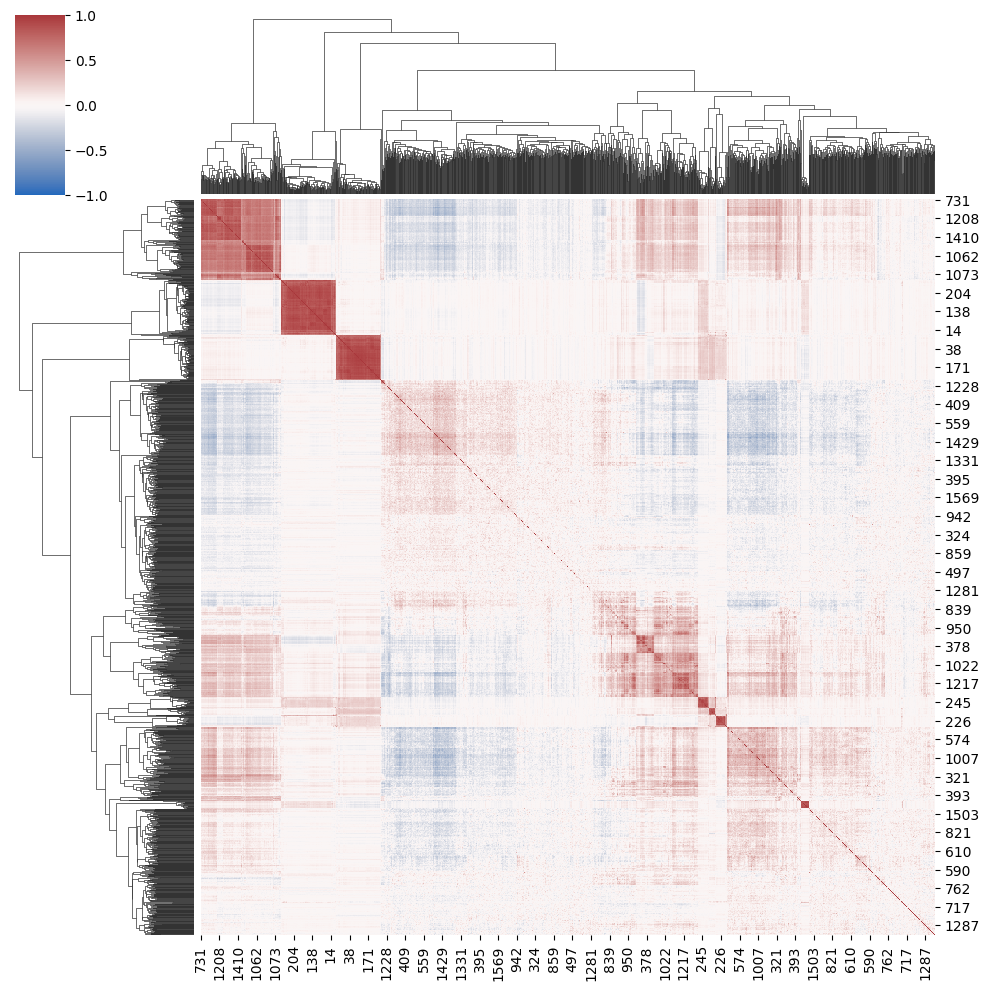

In [190]:
plt.figure(figsize=(14, 14))
sns.clustermap(corr, vmin=-1, vmax=1, center=0, cmap='vlag',)
#plt.savefig('test.png', dpi=600)
plt.show()

In [79]:
df_ = df_filtered_.copy()

In [37]:
df.columns[2057:14385]

Index(['10', '100', '1000', '10000', '10001', '10003', '10004', '10005',
       '10006', '10007',
       ...
       '9985', '9987', '9988', '9989', '999', '9990', '9991', '9992', '9993',
       '9997'],
      dtype='object', length=12328)

In [38]:
cols_expr = df.columns[2057:14385]

In [39]:
df[cols_expr].values[:100]

array([[ 0.        ,  0.89953437,  2.78377377, ...,  0.        ,
        -1.26715391,  0.51367919],
       [ 0.        ,  0.78274638,  2.50780434, ...,  0.        ,
        -1.04055757,  0.41695626],
       [ 0.        ,  1.14671945,  2.51434218, ...,  0.        ,
        -0.94668932,  0.62980442],
       ...,
       [ 0.        , -0.73407488, -0.71564514, ...,  0.        ,
         0.65963041,  0.1813118 ],
       [ 0.        , -1.0787838 , -1.52426062, ...,  0.        ,
         0.31505388,  0.13225586],
       [ 0.        , -0.76746894, -1.28479032, ...,  0.        ,
         0.19550382,  0.28792936]], shape=(100, 12328))

In [231]:
X_.sum(0)

array([ 396.97310429,  209.08865523, -188.17067992, ...,  350.55420354,
        252.17783049, -116.7762547 ], shape=(12328,))

In [80]:
df = df.fillna(0)

In [81]:
X = df[cols_expr].values

In [82]:
X_ = df_[cols_expr].values

In [83]:
target = ['lincs'] * X_.shape[0] + ['tahoe'] * X.shape[0]

In [84]:
X_out = np.concat([X_, X])

In [85]:
data = pd.DataFrame(X_out)

In [86]:
data['dataset'] = target

In [87]:
pca = PCA(n_components=2)
X_new = pca.fit_transform(X_out)

In [88]:
data['pc1'] = X_new[:, 0]
data['pc2'] = X_new[:, 1]

In [106]:
data['cell_line'] = list(df['cell_line']) + list(df_['cellosaurus_id'])

In [107]:
data['drug'] = list(df['drug']) + list(df_['cmap_name'])

In [113]:
data['response'] = list(df['responses']) + list(df_['responses'])

<Axes: xlabel='pc1', ylabel='pc2'>

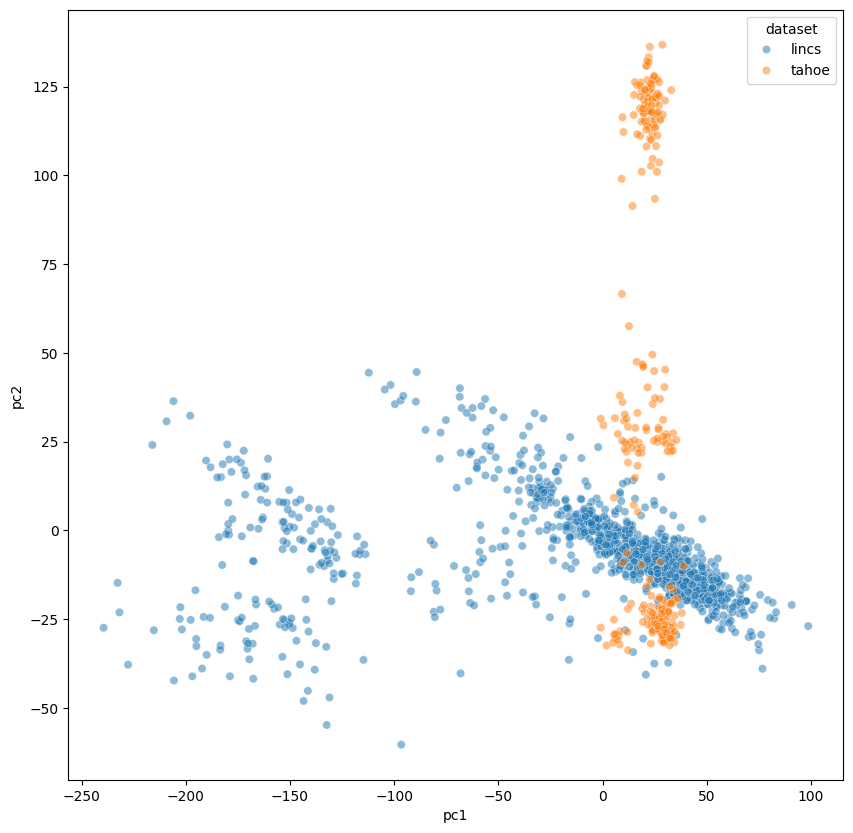

In [89]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data=data, x='pc1', y='pc2', hue='dataset',  alpha=0.5)

<Axes: xlabel='pc1', ylabel='pc2'>

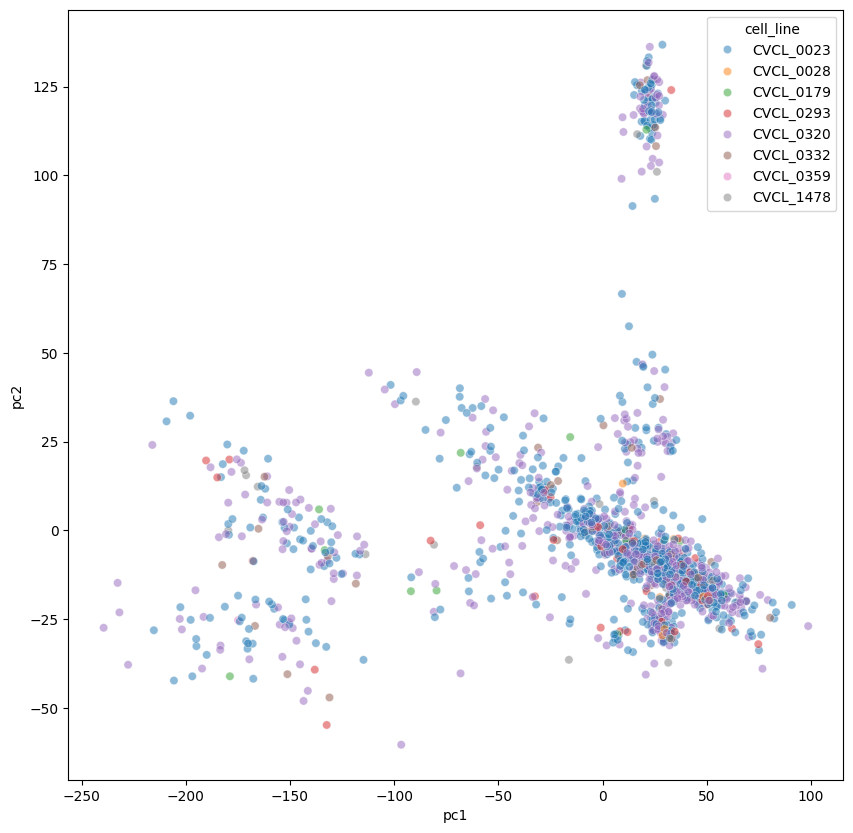

In [108]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data=data, x='pc1', y='pc2', hue='cell_line',  alpha=0.5)

<Axes: xlabel='pc1', ylabel='pc2'>

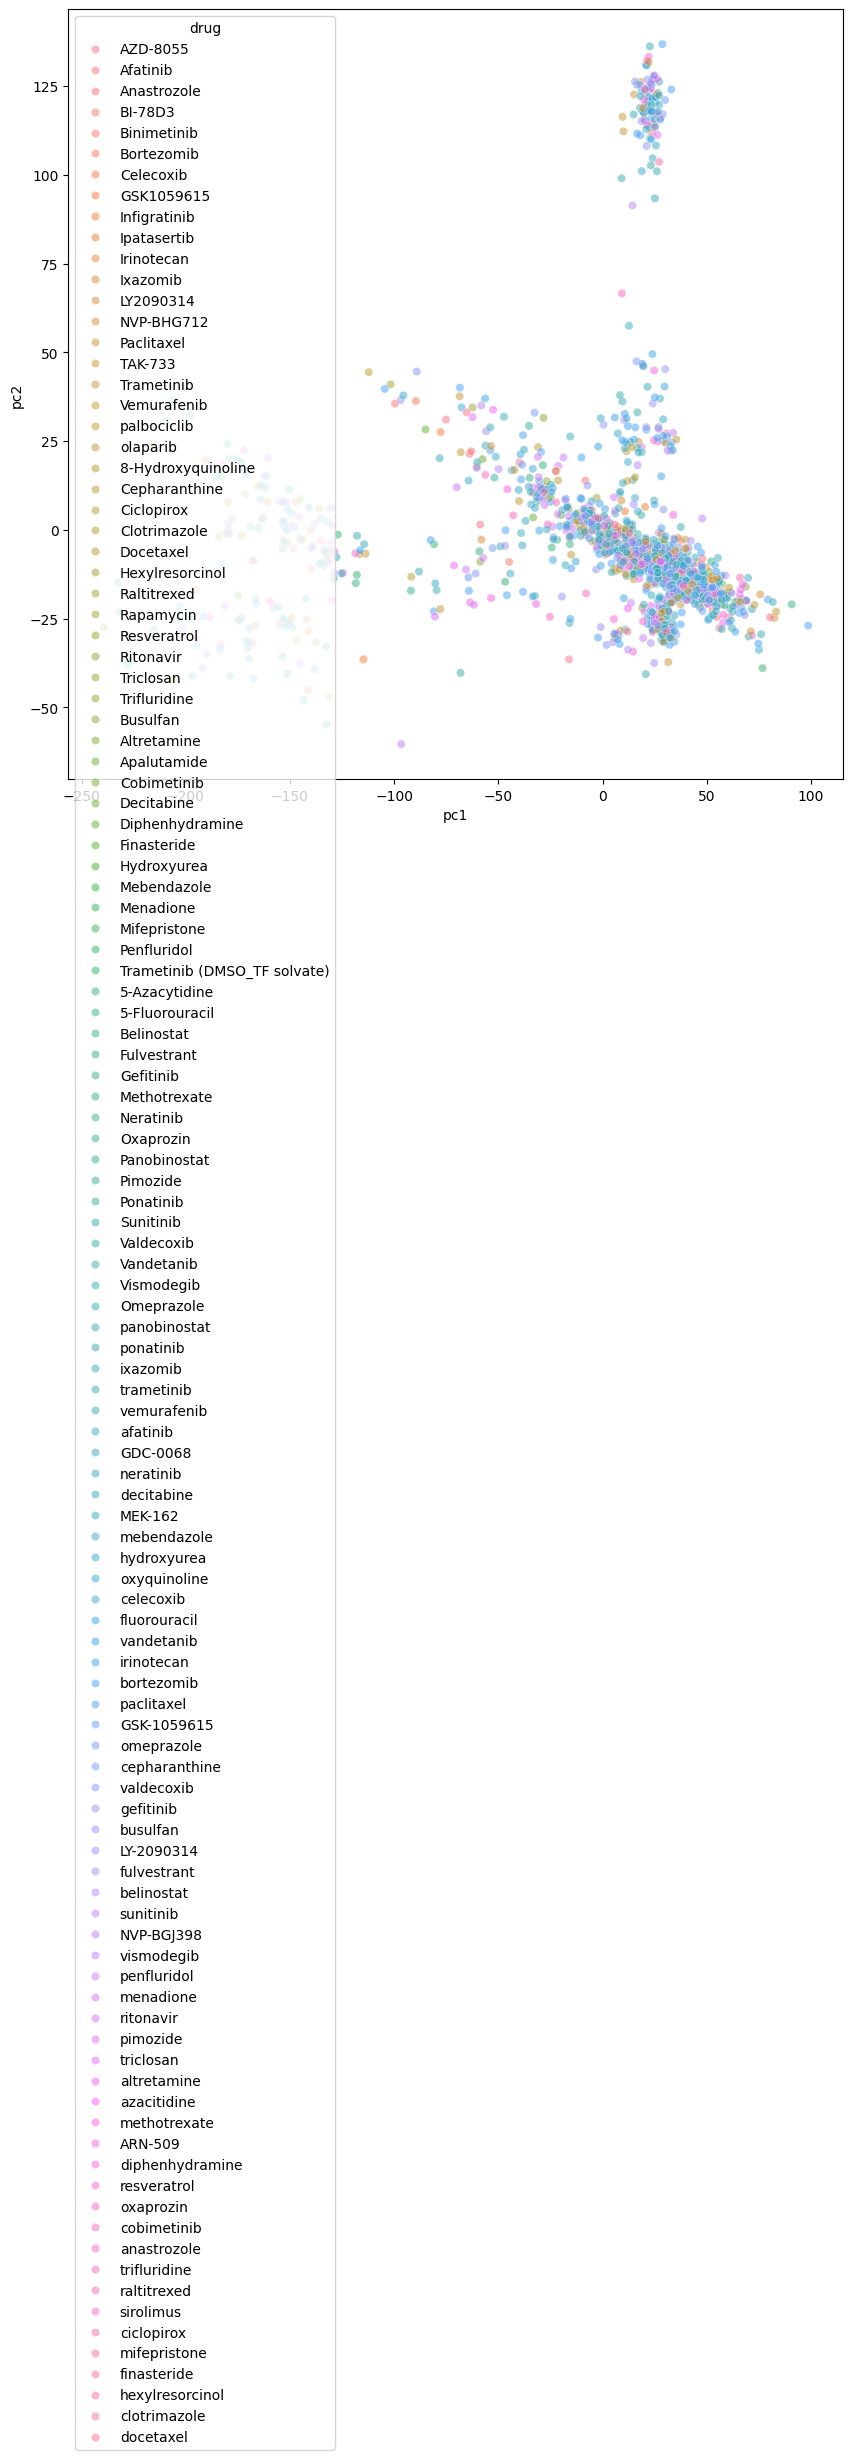

In [109]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data=data, x='pc1', y='pc2', hue='drug',  alpha=0.5)

<Axes: xlabel='pc1', ylabel='pc2'>

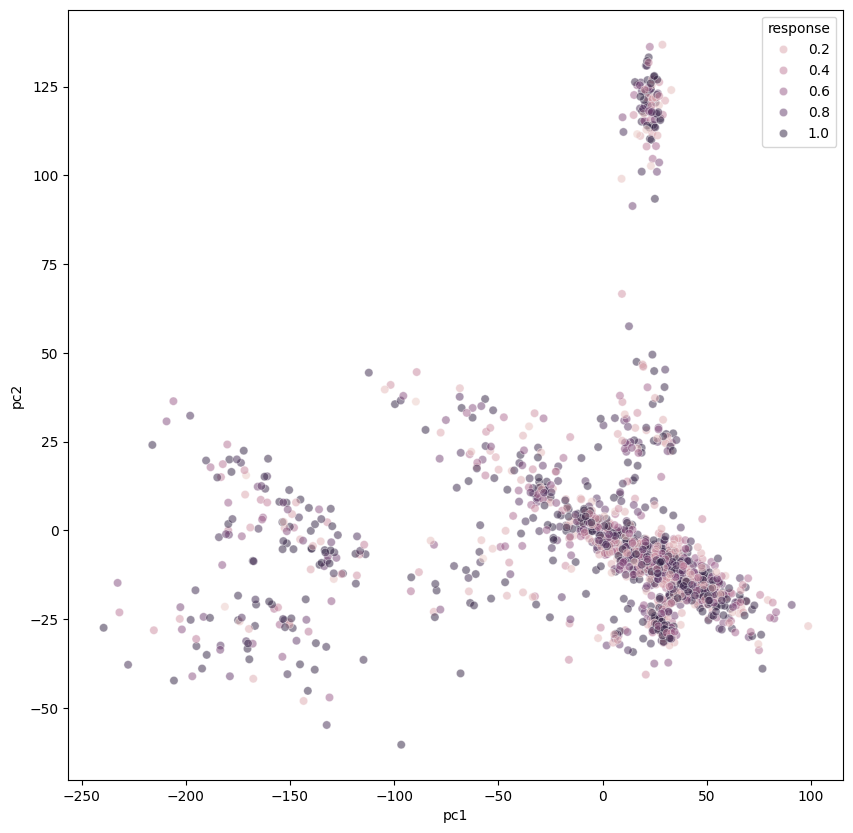

In [114]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data=data, x='pc1', y='pc2', hue='response',  alpha=0.5)

In [124]:
from inmoose.pycombat import pycombat_norm, pycombat_seq

microarray_corrected = pycombat_norm(X_out.T, target)


In [125]:
np.array(microarray_corrected)

array([[ 1.57455969, -0.2527016 , -0.39949915, ...,  0.18113623,
         0.18113623,  0.18113623],
       [ 0.33882823,  0.73944247, -0.71631687, ...,  0.73205209,
        -0.81568803, -0.76895418],
       [-3.55570319,  2.04967788,  0.09076391, ..., -0.77030609,
        -1.58528782, -1.34860842],
       ...,
       [ 0.20769459, -1.42127309, -0.44335432, ...,  1.26161984,
         0.04232181,  0.04232181],
       [ 5.33166794, -0.59503065,  0.20487093, ...,  1.79806033,
         1.97554704,  1.46941574],
       [ 0.67358367, -0.3453527 , -0.21749651, ...,  2.53802032,
         1.7617453 ,  0.09273681]], shape=(12328, 1581))

In [126]:
pca = PCA(n_components=2)
X_new = pca.fit_transform(np.array(microarray_corrected.T))

In [127]:
data['pc1'] = X_new[:, 0]
data['pc2'] = X_new[:, 1]

<Axes: xlabel='pc1', ylabel='pc2'>

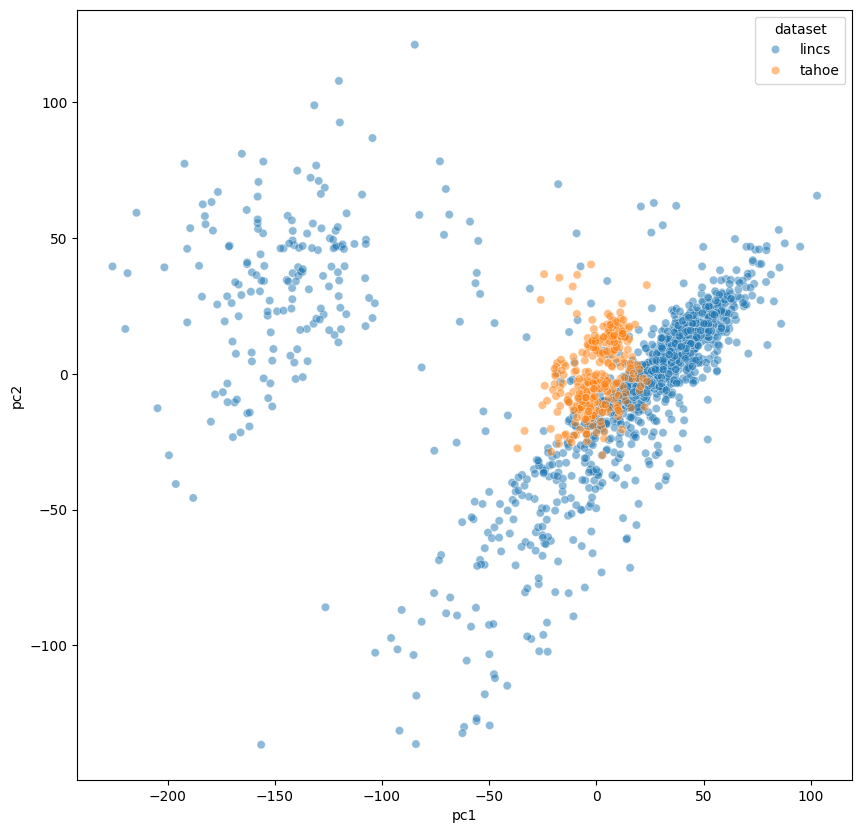

In [128]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data=data, x='pc1', y='pc2', hue='dataset',  alpha=0.5)